## Application of Clustering for Customer Segmentation

Here we model the clustering model for customer segmentation from Mall Customer Data (https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python). This data is consist of columns Gender, Age, Annual Income (k$), and Spending Score (1-100).

We will do segmentation based on Gender, Age, Annual Income and Spending Score with KMeans Clustering and Hierarchial Clustering

### Import Libraries

In [395]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
import seaborn as sns

### Import Dataset

In [396]:
df = pd.read_csv('data/Mall_Customers.csv')
df_original = df.copy()
df = df.drop('CustomerID',axis=1)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [397]:
# print dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [398]:
# print descriptive statistics
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.0,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.0,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.0,99.0


### Data Preprocessing

In [399]:
# Label Encoding for Gender
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df['Gender'] = labelencoder.fit_transform(df['Gender'])
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [400]:
# Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit
col_names = df.columns.tolist()
scd = scaler.fit_transform(df[col_names])
df[col_names] = scd
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.128152,-1.424569,-1.738999,-0.434801
1,1.128152,-1.281035,-1.738999,1.195704
2,-0.886405,-1.352802,-1.700830,-1.715913
3,-0.886405,-1.137502,-1.700830,1.040418
4,-0.886405,-0.563369,-1.662660,-0.395980


### K-Means Clustering

#### Search for the optimum number of cluster (k)

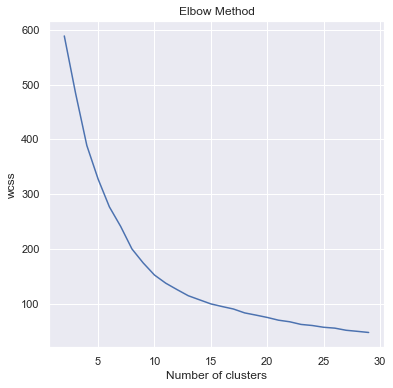

In [401]:
# Transform Data Frame to Numpy Array
np_df = df.to_numpy()
# np_df
rr = range(2,30)
# Elbow Method
from sklearn.cluster import KMeans
wcss = []
for i in rr:
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(np_df)
    wcss.append(kmeans.inertia_)

# Visualize
plt.plot(rr,wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

In [402]:
# Silhoutte Method
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
cls = []
slh_scr = []

for n_cluster in rr:
    kmeans = KMeans(n_clusters=n_cluster,random_state=0).fit(np_df)
    label = kmeans.labels_
    sil_coeff = silhouette_score(np_df, label, metric='euclidean')
    cls.append(n_cluster)
    slh_scr.append(sil_coeff)
#     print('For n_clusters={}, The Silhouette Coefficient is {}'.format(n_cluster, sil_coeff))

# Higher Better
abc = pd.DataFrame({'cluster' : cls, 'slh' : slh_scr})
abc = abc.sort_values(by='slh',ascending=False)
ncls = int(abc.reset_index().loc[0]['cluster'])
abc.head()

,cluster,slh
9,11,0.430990
11,13,0.430231
20,22,0.429051
19,21,0.427854
10,12,0.427588


Based on the results of the Elbow Method and Silhouette Method, it can be conclude that the most ideal number of clusters in this case study is **12 cluster**.

#### Modelling K-Means

In [403]:
# Modelling KMeans
# Apply the K-Means Model to the Data
kmeans = KMeans(n_clusters=ncls, init='k-means++', max_iter=300, n_init=10, random_state=0)
cluster = kmeans.fit_predict(np_df)

In [404]:
df['cluster-kmeans'] = cluster
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster-kmeans
0,1.128152,-1.424569,-1.738999,-0.434801,10
1,1.128152,-1.281035,-1.738999,1.195704,10
2,-0.886405,-1.352802,-1.700830,-1.715913,1
3,-0.886405,-1.137502,-1.700830,1.040418,4
4,-0.886405,-0.563369,-1.662660,-0.395980,1


### Hierarchial Clustering

#### Modelling Hierarchial Clustering

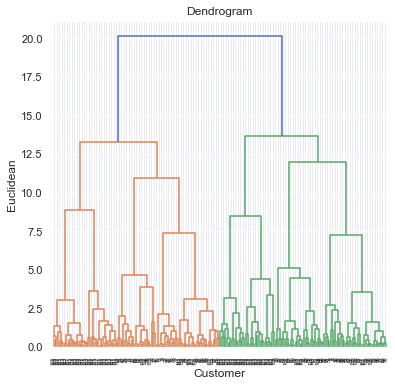

In [405]:
# Hierarchial Clusterring
import scipy.cluster.hierarchy as sch
dend = sch.dendrogram(sch.linkage(np_df, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customer')
plt.ylabel('Euclidean')
plt.show()

In [406]:
# Apply the Hierarchical Clustering Model to the Dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=ncls, affinity='euclidean', linkage='ward')
hcluster = hc.fit_predict(np_df)

In [407]:
df['cluster-hierarchial'] = hcluster
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster-kmeans,cluster-hierarchial
0,1.128152,-1.424569,-1.738999,-0.434801,10,0
1,1.128152,-1.281035,-1.738999,1.195704,10,0
2,-0.886405,-1.352802,-1.700830,-1.715913,1,9
3,-0.886405,-1.137502,-1.700830,1.040418,4,8
4,-0.886405,-0.563369,-1.662660,-0.395980,1,9


### Compare the result between k-means clustering and hierarchial clustering

In [408]:
dfc = df[['cluster-kmeans','cluster-hierarchial']]
dfc['compare'] = df['cluster-kmeans'] == df['cluster-hierarchial']
dfc.head()

<ipython-input-408-42ffeead078c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfc['compare'] = df['cluster-kmeans'] == df['cluster-hierarchial']


,cluster-kmeans,cluster-hierarchial,compare
0,10,0,False
1,10,0,False
2,1,9,False
3,4,8,False
4,1,9,False


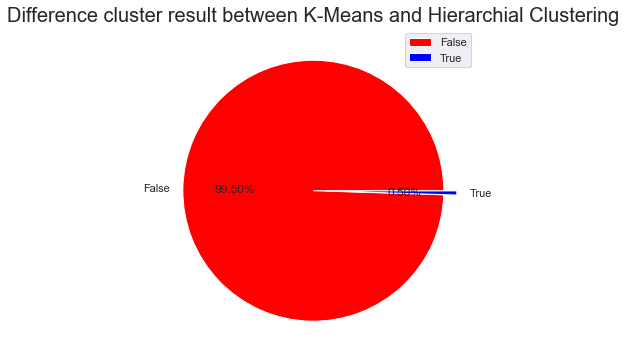

In [412]:
# Difference cluster result between K-Means and Hierarchial Clustering
plt.pie(dfc['compare'].value_counts(), 
        colors = ['Red','Blue'], explode = [0, 0.1], 
        labels = ['False','True'], autopct = '%.2f%%')
plt.title('Difference cluster result between K-Means and Hierarchial Clustering', fontsize = 20)
plt.legend()
# plt.show()

Based on the image above it can be concluded that there is a difference of **99.50%**  for segmentation results based on the value of the cluster.

In [410]:
# Difference cluster result (by frequence) between K-Means and Hierarchial Clustering
dfc_freq = df['cluster-kmeans'].value_counts().to_frame()
dfc_freq = dfc_freq.reset_index().sort_values(by='index')
dfc_freq['cluster-hierarchial'] = df['cluster-hierarchial'].value_counts().to_frame().reset_index().sort_values(by='index')['cluster-hierarchial']
dfc_freq['compare'] = dfc_freq['cluster-kmeans'] == dfc_freq['cluster-hierarchial']
dfc_freq

,index,cluster-kmeans,cluster-hierarchial,compare
10,0,6,4,False
9,1,13,13,True
6,2,18,18,True
4,3,21,21,True
8,4,13,13,True
1,5,25,25,True
5,6,20,18,False
3,7,21,23,False
7,8,14,15,False
0,9,26,25,False


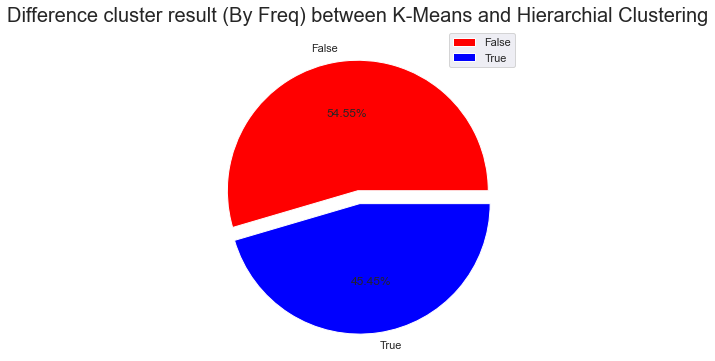

In [411]:
# Difference cluster result between K-Means and Hierarchial Clustering
plt.pie(dfc_freq['compare'].value_counts(), 
        colors = ['Red','Blue'], explode = [0, 0.1], 
        labels = ['False','True'], autopct = '%.2f%%')
plt.title('Difference cluster result (By Freq) between K-Means and Hierarchial Clustering', fontsize = 20)
plt.legend()
# plt.show()